#**Lead score case study**

##problem statement:
X Education wants help in selecting the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires to build a machine learning model, wherein a lead score needs to be assigned to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.


## Goals of the Case Study:


*   Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.





In [2]:
# importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings   # suppressing the warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [3]:
# importing the data set
df= pd.read_csv("Leads.csv")
df.head()


Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [4]:
df.shape

(9240, 37)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# dropping the prospect id and lead number columns 

df.drop(['Prospect ID','Lead Number'], axis=1, inplace= True)

In [7]:
df.describe()

Converted  TotalVisits  Total Time Spent on Website  \
count  9240.000000  9103.000000                  9240.000000   
mean      0.385390     3.445238                   487.698268   
std       0.486714     4.854853                   548.021466   
min       0.000000     0.000000                     0.000000   
25%       0.000000     1.000000                    12.000000   
50%       0.000000     3.000000                   248.000000   
75%       1.000000     5.000000                   936.000000   
max       1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [8]:
#pd.set_option('display.max_columns', None)
df.head()

Lead Origin     Lead Source Do Not Email Do Not Call  \
0                      API      Olark Chat           No          No   
1                      API  Organic Search           No          No   
2  Landing Page Submission  Direct Traffic           No          No   
3  Landing Page Submission  Direct Traffic           No          No   
4  Landing Page Submission          Google           No          No   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity Country  ... Get updates on DM Content  \
0  Page Visited on Website     NaN  ...                        No   
1             Email Opened   India  ...                        No   
2             Email Opened   India  ...                        No   
3              Unreachable   India  ...                        No   
4        Converted to Lead   India  ...                        No   

     Lead Profile    City Asymmetrique Activity Index  \
0          Select  Select                   02.Medium   
1          Select  Select                   02.Medium   
2  Potential Lead  Mumbai                   02.Medium   
3          Select  Mumbai                   02.Medium   
4          Select  Mumbai                   02.Medium   

  Asymmetrique Profile Index Asymmetrique Activity Score  \
0                  02.Medium                        15.0   
1                  02.Medium                        15.0   
2                    01.High                        14.0   
3                    01.High                        13.0   
4                    01.High                        15.0   

  Asymmetrique Profile Score I agree to pay the amount through cheque  \
0                       15.0                                       No   
1                       15.0                                       No   
2                       20.0                                       No   
3                       17.0                                       No   
4                       18.0                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 35 columns]

In [9]:
df.Specialization.value_counts(normalize= True, dropna= False)*100

Select                               21.017316
NaN                                  15.562771
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

In [10]:
# there is a missing value indicator : Select , replacing the value with the null value
df= df.replace('Select',np.nan)

In [11]:
df.Specialization.value_counts(normalize= True, dropna= False)*100

NaN                                  36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

In [12]:
df.head()

Lead Origin     Lead Source Do Not Email Do Not Call  \
0                      API      Olark Chat           No          No   
1                      API  Organic Search           No          No   
2  Landing Page Submission  Direct Traffic           No          No   
3  Landing Page Submission  Direct Traffic           No          No   
4  Landing Page Submission          Google           No          No   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity Country  ... Get updates on DM Content  \
0  Page Visited on Website     NaN  ...                        No   
1             Email Opened   India  ...                        No   
2             Email Opened   India  ...                        No   
3              Unreachable   India  ...                        No   
4        Converted to Lead   India  ...                        No   

     Lead Profile    City Asymmetrique Activity Index  \
0             NaN     NaN                   02.Medium   
1             NaN     NaN                   02.Medium   
2  Potential Lead  Mumbai                   02.Medium   
3             NaN  Mumbai                   02.Medium   
4             NaN  Mumbai                   02.Medium   

  Asymmetrique Profile Index Asymmetrique Activity Score  \
0                  02.Medium                        15.0   
1                  02.Medium                        15.0   
2                    01.High                        14.0   
3                    01.High                        13.0   
4                    01.High                        15.0   

  Asymmetrique Profile Score I agree to pay the amount through cheque  \
0                       15.0                                       No   
1                       15.0                                       No   
2                       20.0                                       No   
3                       17.0                                       No   
4                       18.0                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 35 columns]

In [13]:
# Checking if there are columns with one unique value since it won't affect our analysis
df.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

In [14]:
# Dropping unique valued columns
df.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1, inplace= True)


In [15]:
# counting for null values in the columns after replacing the select value with nan value
df.isnull().sum() * 100 / len(df)

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

In [16]:
# dropping columns with more than 35% null values retaining Specilization  column as its important
df1= df.drop(['Tags','How did you hear about X Education','Lead Profile','City','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Quality'], axis =1)

In [17]:
# null values of columns after dropping the columns with 40% missing value
df1.isnull().sum() * 100 / len(df1)

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.000000
Newspaper                                         0.0000

In [18]:
df1.Country.value_counts(normalize= True)*100

India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Hong Kong                0.103260
Bahrain                  0.103260
Oman                     0.088509
France                   0.088509
unknown                  0.073757
South Africa             0.059006
Nigeria                  0.059006
Germany                  0.059006
Kuwait                   0.059006
Canada                   0.059006
Sweden                   0.044254
China                    0.029503
Asia/Pacific Region      0.029503
Uganda                   0.029503
Bangladesh               0.029503
Italy                    0.029503
Belgium                  0.029503
Netherlands              0.029503
Ghana                    0.029503
Philippines              0.029503
Russia                   0.014751
Switzerland   

In [19]:
#dropping the country column as the data is biased towards india values
df1.drop('Country',axis= 1, inplace = True)


In [20]:
df1.head()

Lead Origin     Lead Source Do Not Email Do Not Call  \
0                      API      Olark Chat           No          No   
1                      API  Organic Search           No          No   
2  Landing Page Submission  Direct Traffic           No          No   
3  Landing Page Submission  Direct Traffic           No          No   
4  Landing Page Submission          Google           No          No   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                      NaN   
1             Email Opened                      NaN   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                      NaN   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Newspaper Article  \
0                       Better Career Prospects     No                No   
1                       Better Career Prospects     No                No   
2                       Better Career Prospects     No                No   
3                       Better Career Prospects     No                No   
4                       Better Career Prospects     No                No   

  X Education Forums Newspaper Digital Advertisement Through Recommendations  \
0                 No        No                    No                      No   
1                 No        No                    No                      No   
2                 No        No                    No                      No   
3                 No        No                    No                      No   
4                 No        No                    No                      No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified

In [21]:
df1['Specialization'] = df1['Specialization'].fillna('not provided') 
#df1['What matters most to you in choosing a course'] = df1['What matters most to you in choosing a course'].fillna('not provided')
#df1['What is your current occupation'] = df1['What is your current occupation'].fillna('not provided')
#df1.info()

In [22]:
df1.TotalVisits.isnull().sum()

137

In [23]:
df1= df1[~df1.TotalVisits.isnull()]

In [24]:
df1.TotalVisits.isnull().sum()

0

In [25]:
# Outlier handling -- univariate analysis
df1['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [26]:
# TotalVisits column has outliers hence dropping the outlier values as the number of rows with those values are very less
df1= df1[~(df1.TotalVisits> 100)]

In [27]:
df1['TotalVisits'].describe()

count    9100.000000
mean        3.390659
std         3.659514
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        74.000000
Name: TotalVisits, dtype: float64

In [28]:
df1['What is your current occupation'].value_counts(normalize=True)*100

Unemployed              85.696479
Working Professional    10.579620
Student                  3.225304
Other                    0.233718
Housewife                0.140231
Businessman              0.124649
Name: What is your current occupation, dtype: float64

In [29]:
df1['What is your current occupation'].mode()

0    Unemployed
dtype: object

In [30]:
# best imputation value would be mode as it 85% of the non-missing value
df1['What is your current occupation'] = df1['What is your current occupation'].fillna(df1['What is your current occupation'].mode()[0])

In [31]:
df1['What is your current occupation'].isnull().sum()

0

In [32]:
df1['What matters most to you in choosing a course'].value_counts(normalize=True)

Better Career Prospects      0.999687
Flexibility & Convenience    0.000156
Other                        0.000156
Name: What matters most to you in choosing a course, dtype: float64

In [33]:
# best imputation value would be mode as it 99% of the non-missing value
df1['What matters most to you in choosing a course']= df1['What matters most to you in choosing a course'].fillna(df1['What matters most to you in choosing a course'].mode()[0])


In [34]:
df1['What matters most to you in choosing a course'].isnull().sum()

0

In [35]:
df1['Lead Source'].value_counts(normalize=True)

Google               0.316172
Direct Traffic       0.280123
Olark Chat           0.193253
Organic Search       0.127219
Reference            0.048837
Welingak Website     0.014221
Referral Sites       0.013670
Facebook             0.003417
bing                 0.000661
google               0.000551
Click2call           0.000441
Press_Release        0.000220
Social Media         0.000220
Live Chat            0.000220
youtubechannel       0.000110
testone              0.000110
Pay per Click Ads    0.000110
welearnblog_Home     0.000110
WeLearn              0.000110
blog                 0.000110
NC_EDM               0.000110
Name: Lead Source, dtype: float64

In [36]:
# trying to merge similar values in order to reduce the dummy variables  and inturn the number of columns

df1['Lead Source']= df1['Lead Source'].replace(['Google','google'], 'Google')
#df1['Lead Source']= df1['Lead Source'].replace(['WeLearn','welearnblog_Home','blog'], 'welearnblog')
#df1['Lead Source']= df1['Lead Source'].replace(['Facebook','Social Media','youtubechannel'], 'Social Media')
#df1['Lead Source']= df1['Lead Source'].replace(['Welingak Website','Referral Sites','welearnblog'], 'Websites')
#df1['Lead Source']= df1['Lead Source'].replace(['Olark Chat','Live Chat'], 'Chat')
#df1['Lead Source']= df1['Lead Source'].replace(['Press_Release','Pay per Click Ads','testone','NC_EDM'], 'other sources')



In [37]:
df1['Lead Source'].value_counts(dropna= False,normalize=True)*100

Google               31.571429
Direct Traffic       27.923077
Olark Chat           19.263736
Organic Search       12.681319
Reference             4.868132
Welingak Website      1.417582
Referral Sites        1.362637
Facebook              0.340659
NaN                   0.318681
bing                  0.065934
Click2call            0.043956
Social Media          0.021978
Live Chat             0.021978
Press_Release         0.021978
Pay per Click Ads     0.010989
blog                  0.010989
WeLearn               0.010989
welearnblog_Home      0.010989
youtubechannel        0.010989
testone               0.010989
NC_EDM                0.010989
Name: Lead Source, dtype: float64

In [38]:
# number of null values is less so dropping them would be suitable
df1= df1[~df1['Lead Source'].isnull()]


In [39]:
df1['Lead Source'].isnull().sum()

0

In [40]:
df1.isnull().sum() * 100 / len(df1)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                          0.0
A free copy of Mastering The Interview        

### outlier analysis

In [41]:
df1[['TotalVisits',	'Total Time Spent on Website',	'Page Views Per Visit']].describe(percentiles=[.25, .5, .75, .90, .95, .99])

TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  9071.000000                  9071.000000           9071.000000
mean      3.401279                   482.937934              2.369127
std       3.660471                   545.311359              2.159857
min       0.000000                     0.000000              0.000000
25%       1.000000                    11.000000              1.000000
50%       3.000000                   246.000000              2.000000
75%       5.000000                   923.500000              3.185000
90%       7.000000                  1373.000000              5.000000
95%      10.000000                  1557.000000              6.000000
99%      17.000000                  1839.000000              9.000000
max      74.000000                  2272.000000             55.000000

{'whiskers': [<matplotlib.lines.Line2D at 0x7f78f1587550>,
 'caps': [<matplotlib.lines.Line2D at 0x7f78f1587c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f78f15871f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f78f159c310>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f78f159c610>],
 'means': []}

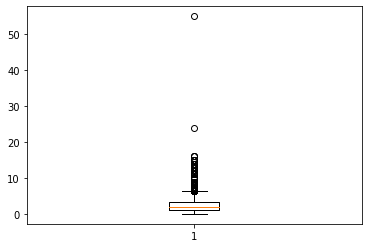

In [42]:
# most of the points lie within the 0 to 10 range with few outliers in the range between 10 to 20. We see one outlier point in 55 values
plt.boxplot(df1['Page Views Per Visit'])


{'whiskers': [<matplotlib.lines.Line2D at 0x7f78f10cd730>,
 'caps': [<matplotlib.lines.Line2D at 0x7f78f10cddf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f78f10cd3d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f78f10d84f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f78f10d87f0>],
 'means': []}

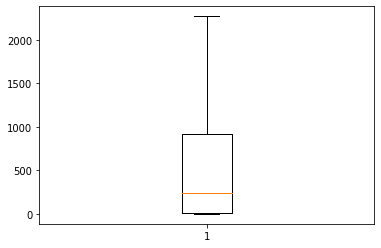

In [43]:
# The mean of the boxplot is around 250 and the quantile range is within 100 to 1000 Very few outliers might be present arount 2000 value
plt.boxplot(df1['Total Time Spent on Website'])


{'whiskers': [<matplotlib.lines.Line2D at 0x7f78f107a610>,
 'caps': [<matplotlib.lines.Line2D at 0x7f78f1072eb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f78f10e5130>],
 'medians': [<matplotlib.lines.Line2D at 0x7f78f10e9ee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f78f10e9580>],
 'means': []}

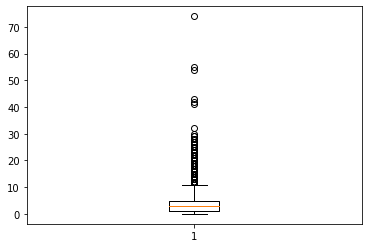

In [44]:
# The column had few points in more than 100 values , dropped them as there was many outlier points in the column, the mean of box plot is aournd 5 , the box plot extends from 0 to 10 and outliers extending above 70
plt.boxplot(df1['TotalVisits'])

In [45]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9071 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9071 non-null   object 
 1   Lead Source                                    9071 non-null   object 
 2   Do Not Email                                   9071 non-null   object 
 3   Do Not Call                                    9071 non-null   object 
 4   Converted                                      9071 non-null   int64  
 5   TotalVisits                                    9071 non-null   float64
 6   Total Time Spent on Website                    9071 non-null   int64  
 7   Page Views Per Visit                           9071 non-null   float64
 8   Last Activity                                  9071 non-null   object 
 9   Specialization                                 9071 

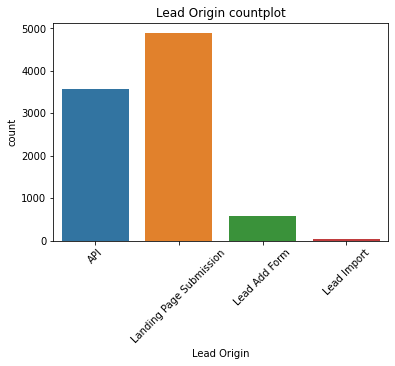

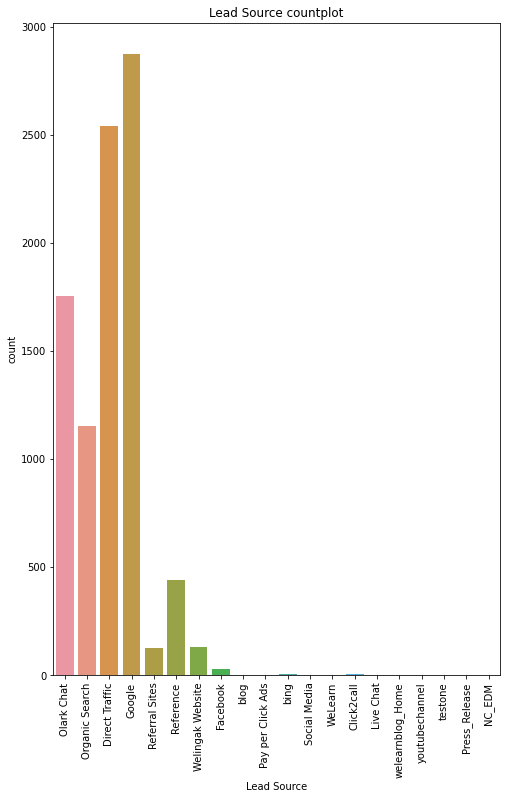

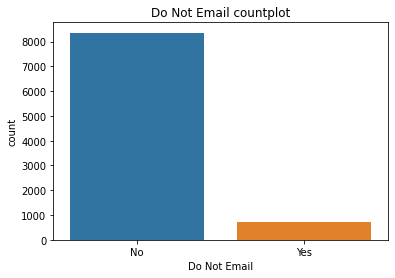

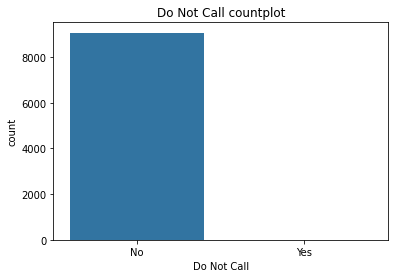

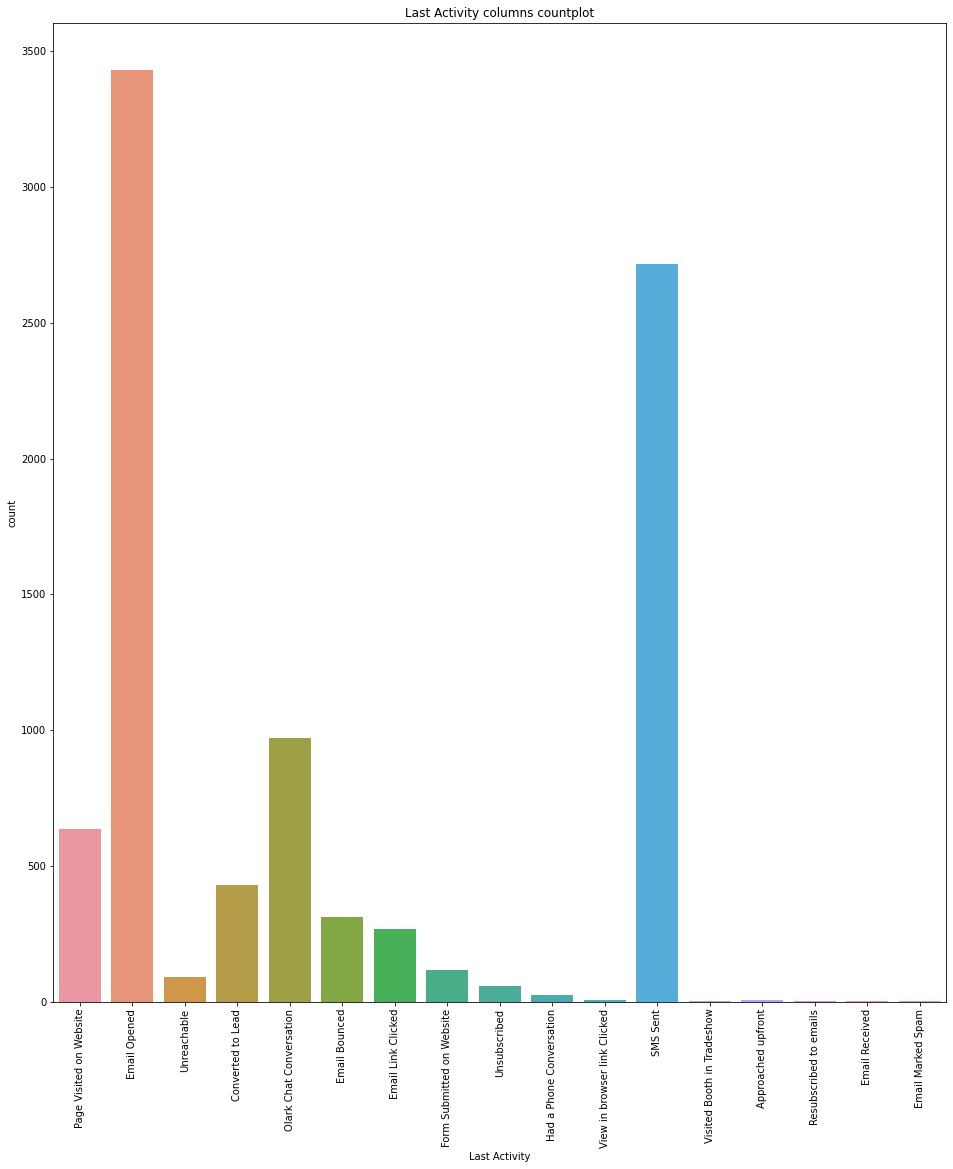

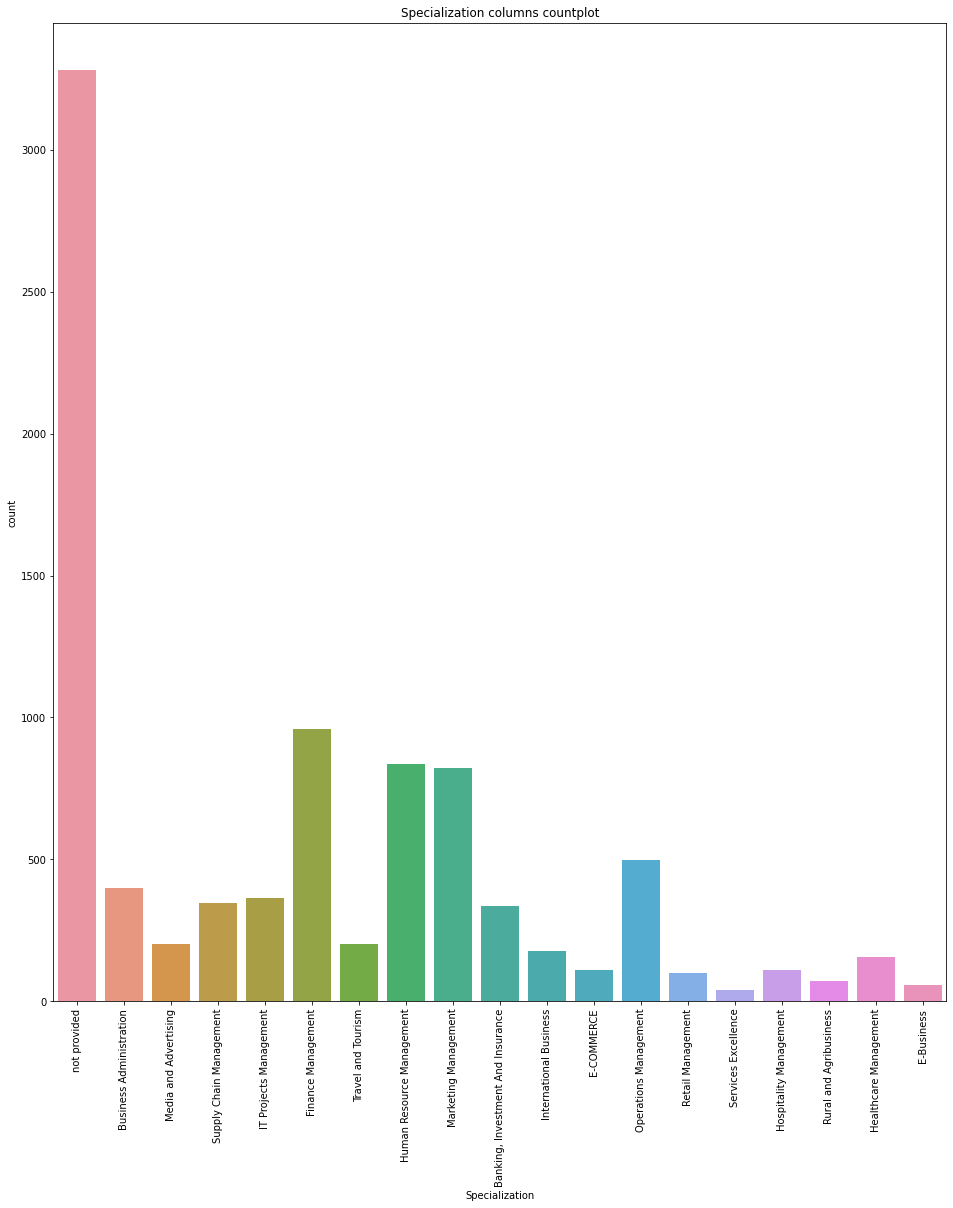

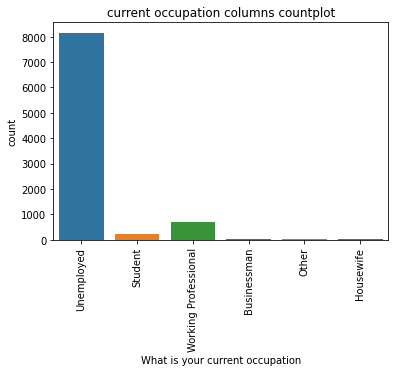

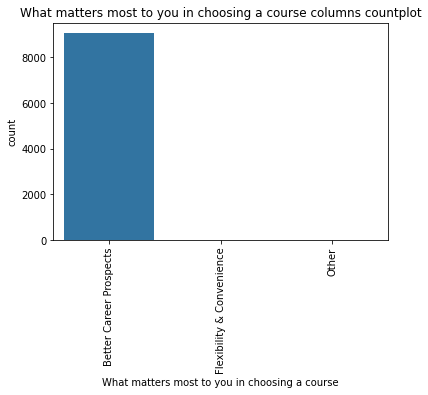

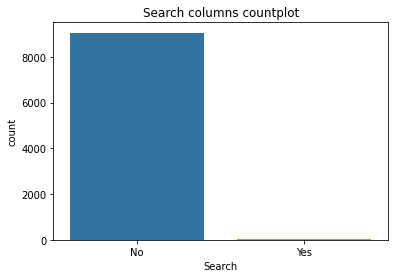

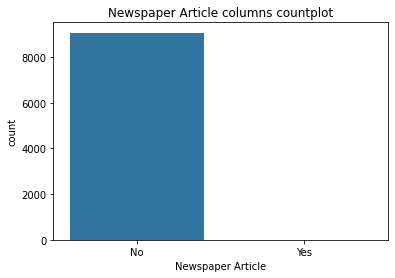

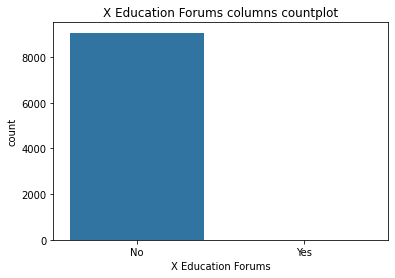

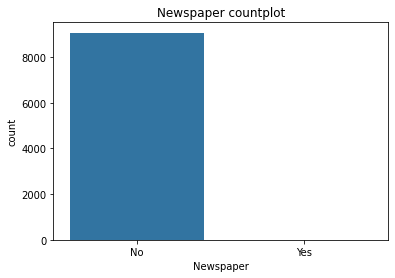

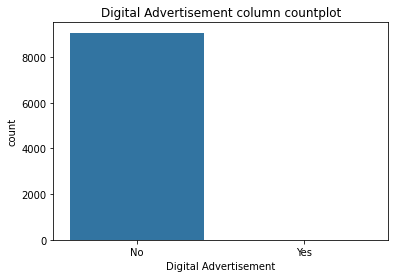

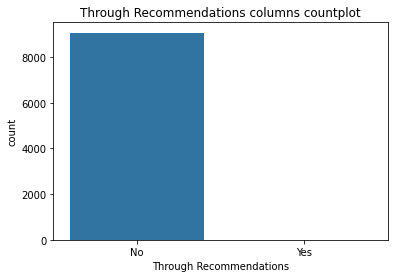

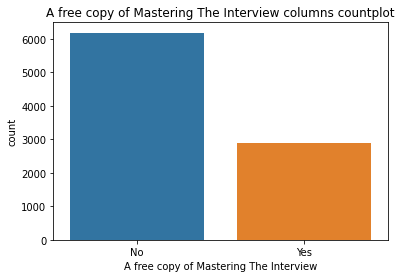

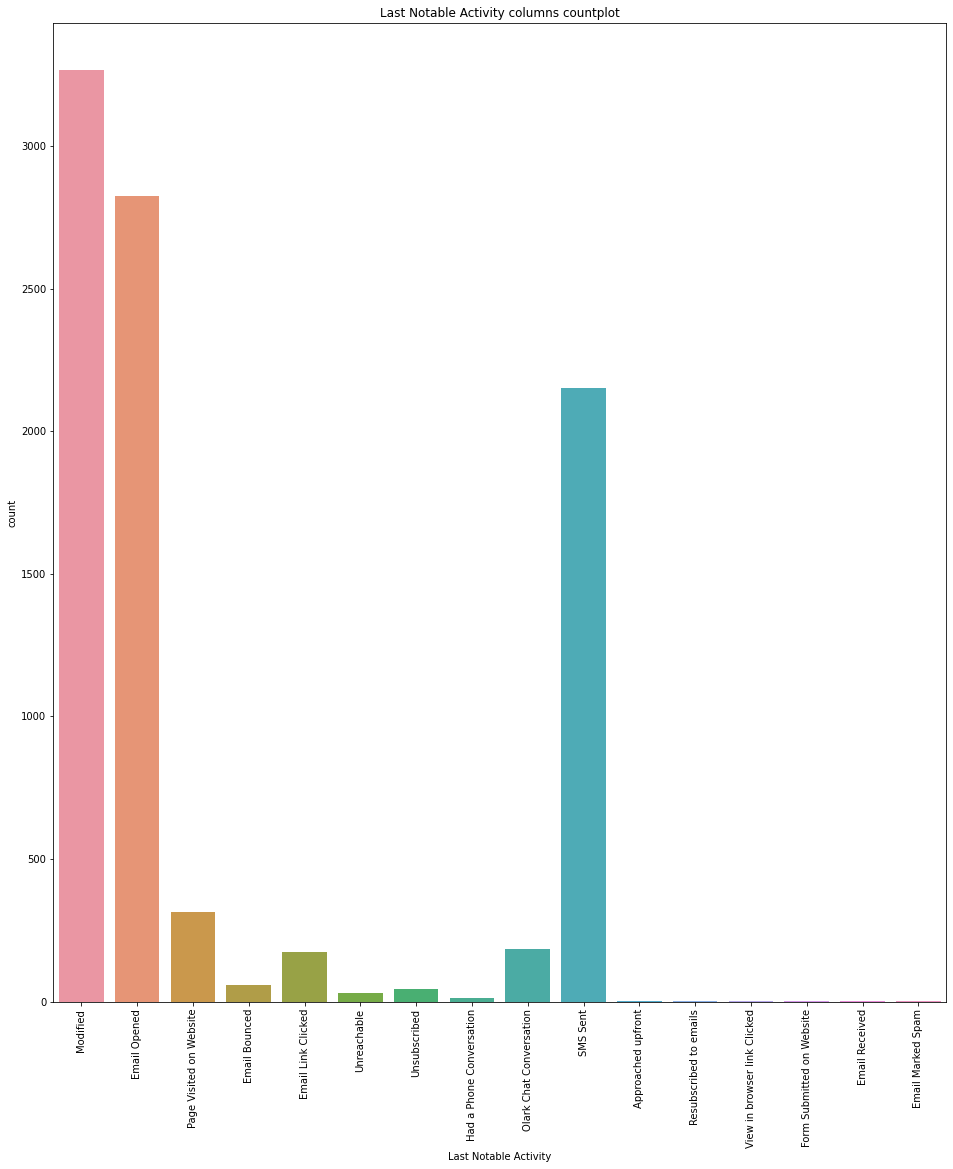

In [46]:
#visualizing the categorical columns using box-plot
plt.title('Lead Origin countplot')
sns.countplot(df1['Lead Origin'])
plt.xticks( rotation = 45)
plt.show()


plt.figure(figsize=[8,12])
plt.title('Lead Source countplot')
sns.countplot(df1['Lead Source'] )
plt.xticks( rotation = 90)
plt.show()


plt.title('Do Not Email countplot')
sns.countplot(df1['Do Not Email'])
plt.show()

plt.title('Do Not Call countplot')
sns.countplot(df1['Do Not Call'])
plt.show()

plt.figure(figsize=[16,18])
plt.title('Last Activity columns countplot')
sns.countplot(df1['Last Activity'])
plt.xticks( rotation = 90)
plt.show()

plt.figure(figsize=[16,18])
plt.title('Specialization columns countplot')
sns.countplot(df1['Specialization'])
plt.xticks( rotation = 90)
plt.show()

plt.title('current occupation columns countplot')
sns.countplot(df1['What is your current occupation'])
plt.xticks( rotation = 90)

plt.show()

plt.title('What matters most to you in choosing a course columns countplot')
sns.countplot(df1['What matters most to you in choosing a course'])
plt.xticks( rotation = 90)

plt.show()

plt.title('Search columns countplot')
sns.countplot(df1['Search'])
plt.show()

plt.title('Newspaper Article columns countplot')
sns.countplot(df1['Newspaper Article'])
plt.show()

plt.title('X Education Forums columns countplot')
sns.countplot(df1['X Education Forums'])
plt.show()

plt.title('Newspaper countplot')
sns.countplot(df1['Newspaper'])
plt.show()


plt.title('Digital Advertisement column countplot')
sns.countplot(df1['Digital Advertisement'])
plt.show()

plt.title('Through Recommendations columns countplot')
sns.countplot(df1['Through Recommendations'])
plt.show()

plt.title('A free copy of Mastering The Interview columns countplot')
sns.countplot(df1['A free copy of Mastering The Interview'])
plt.show()

plt.figure(figsize=[16,18])
plt.title('Last Notable Activity columns countplot')
sns.countplot(df1['Last Notable Activity'])
plt.xticks( rotation = 90)

plt.show()

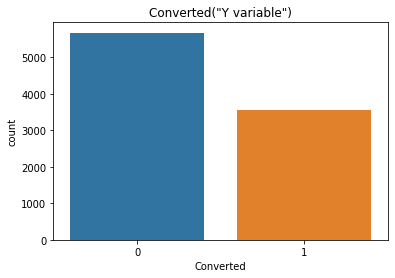

In [47]:
sns.countplot(df['Converted'])
plt.title('Converted("Y variable")')
plt.show()

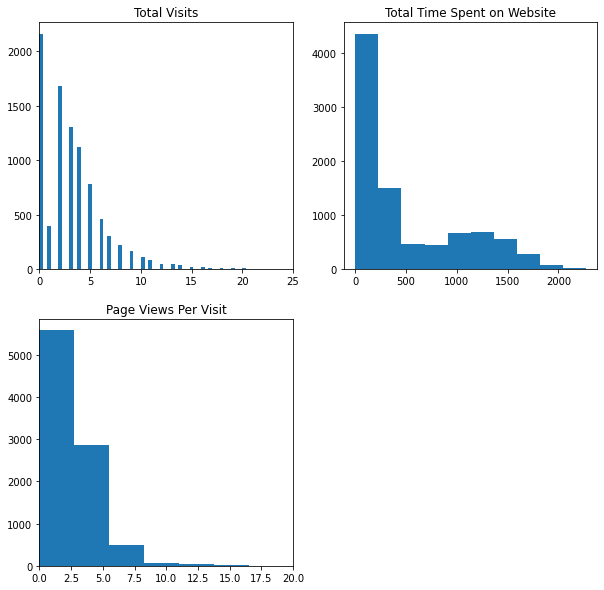

In [48]:
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(df1['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(df1['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(df1['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

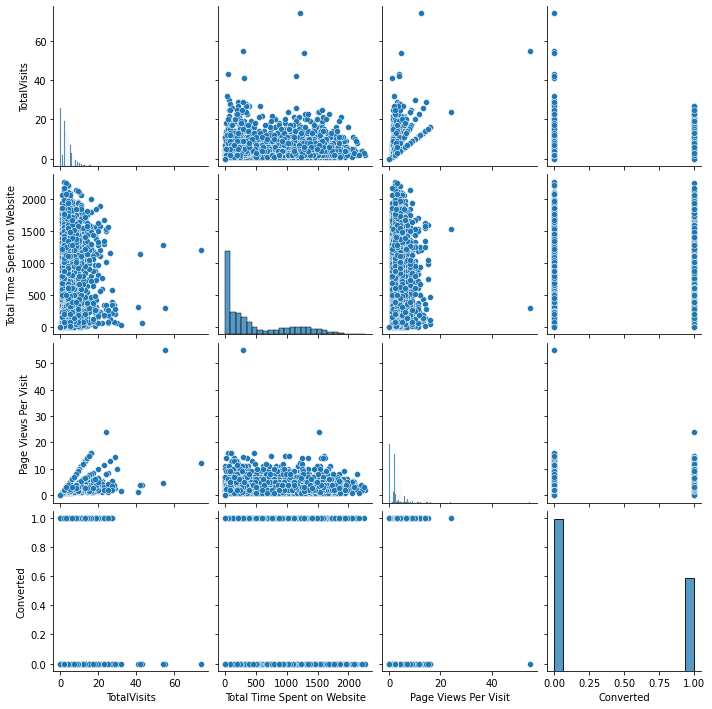

In [49]:
# sns pair plot

sns.pairplot(df1[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']])
plt.show()

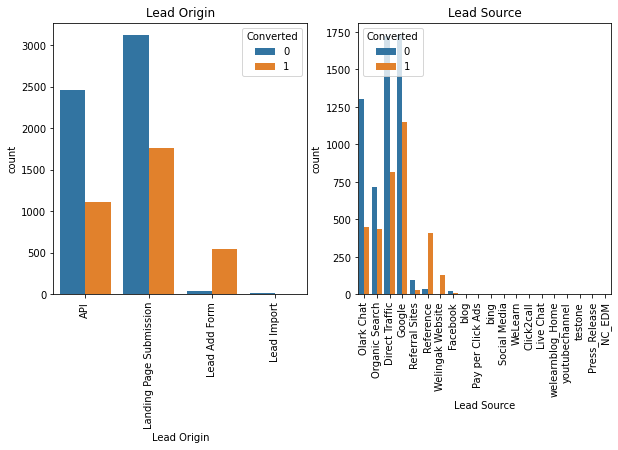

In [50]:
#Relating converted to categorical variables
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= df1).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= df1).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

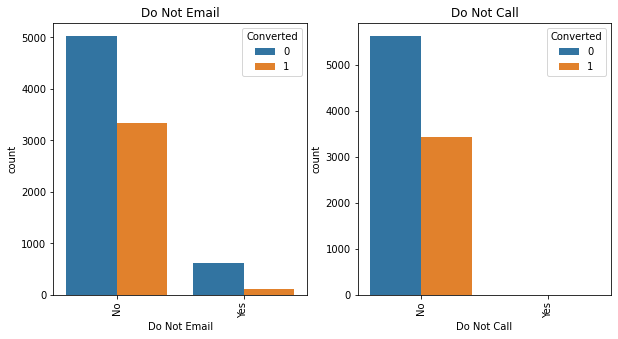

In [51]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= df1).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= df1).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')
plt.show()

Text(0.5, 1.0, 'Last Activity')

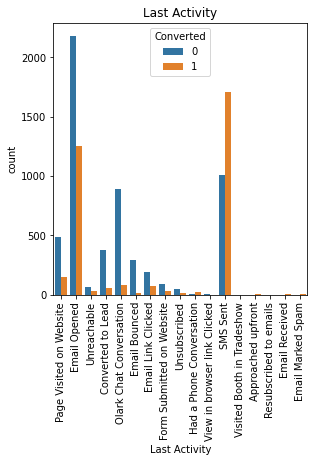

In [52]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= df1).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')



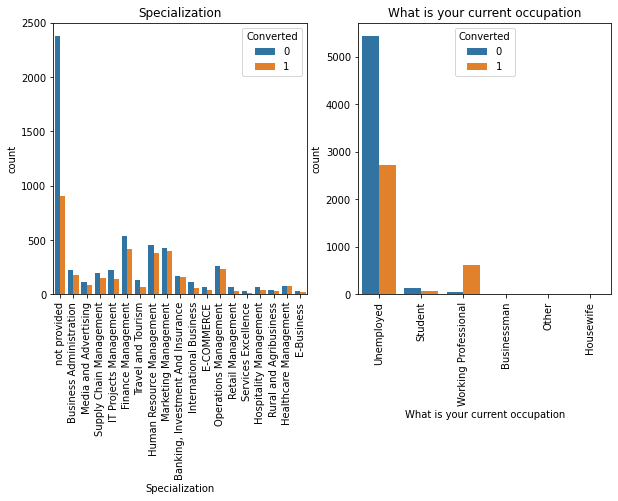

In [53]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= df1).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= df1).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

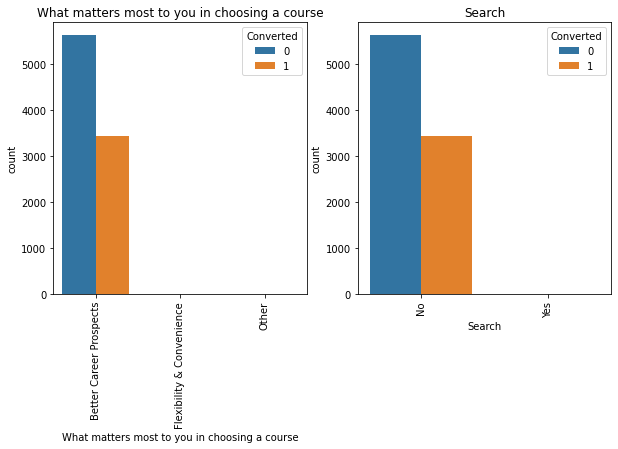

In [54]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= df1).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='Search', hue='Converted', data= df1).tick_params(axis='x', rotation = 90)
plt.title('Search')
plt.show()

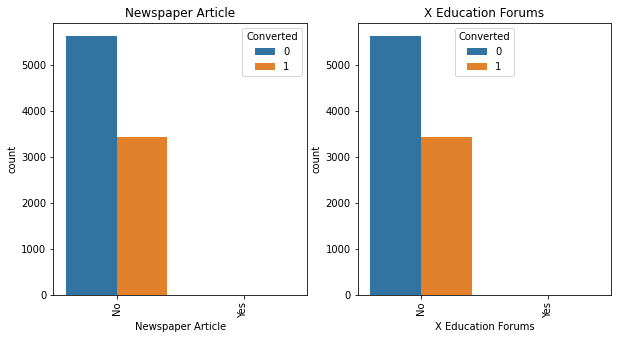

In [55]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper Article', hue='Converted', data= df1).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(1,2,2)
sns.countplot(x='X Education Forums', hue='Converted', data= df1).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')
plt.show()

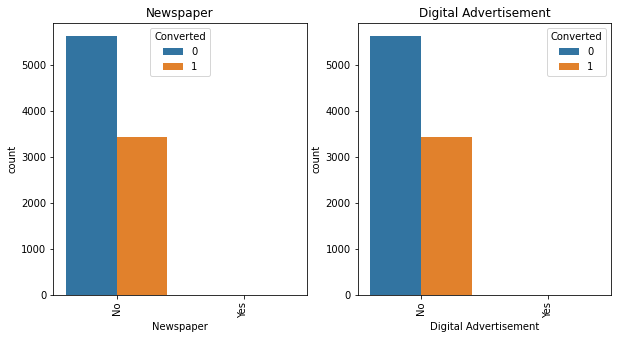

In [56]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper', hue='Converted', data= df1).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(1,2,2)
sns.countplot(x='Digital Advertisement', hue='Converted', data= df1).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')
plt.show()

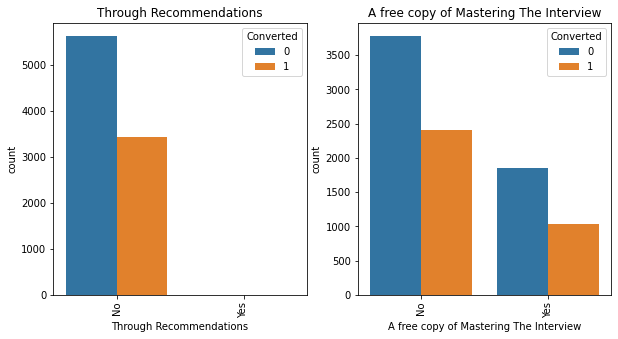

In [57]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Through Recommendations', hue='Converted', data= df1).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= df1).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')
plt.show()

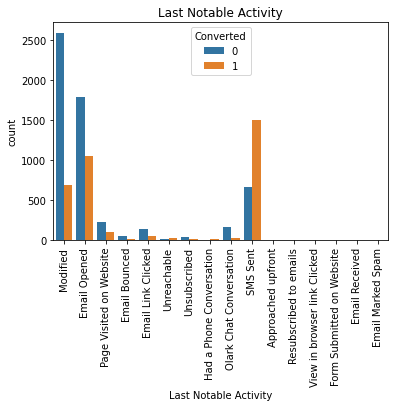

In [58]:
sns.countplot(x='Last Notable Activity', hue='Converted', data= df1).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

#### some observations on the plots : Relating categorical variables and target variable


Last Activity : In this graph we see people to whom has been sent SMS has converted more, and rought 50% or more customers has been converted via email opened category

What is your current occupation: Here we observe that people who are unemployed are the most interested followed by working professional

Specialization: Here we obersver people who opted for finance managment are the most converted leads. The null values are indicated using 'not provided'.
What is your current occupation: Here we observe that people who are unemployed are the most interested followed by working professional

Lead Origin:  API and Landing page submission category the conversion rate is higher.

Lead Source: An in this case, the conersion rate from google, direct traffic and olark chat is the highest.



In [59]:
# creating dummy variables for categorical values

df1.head()

Lead Origin     Lead Source Do Not Email Do Not Call  \
0                      API      Olark Chat           No          No   
1                      API  Organic Search           No          No   
2  Landing Page Submission  Direct Traffic           No          No   
3  Landing Page Submission  Direct Traffic           No          No   
4  Landing Page Submission          Google           No          No   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website             not provided   
1             Email Opened             not provided   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead             not provided   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Newspaper Article  \
0                       Better Career Prospects     No                No   
1                       Better Career Prospects     No                No   
2                       Better Career Prospects     No                No   
3                       Better Career Prospects     No                No   
4                       Better Career Prospects     No                No   

  X Education Forums Newspaper Digital Advertisement Through Recommendations  \
0                 No        No                    No                      No   
1                 No        No                    No                      No   
2                 No        No                    No                      No   
3                 No        No                    No                      No   
4                 No        No                    No                      No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified

In [60]:
# converting yes/ no values into 1/0 values for the columns : binary mapping
column_list= ['Do Not Email','Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']


In [61]:
# map function
def binary_map(x):
  return x.map({'Yes':1, 'No':0})

df1[column_list]= df1[column_list].apply(binary_map)

In [62]:
df1.head()

Lead Origin     Lead Source  Do Not Email  Do Not Call  \
0                      API      Olark Chat             0            0   
1                      API  Organic Search             0            0   
2  Landing Page Submission  Direct Traffic             0            0   
3  Landing Page Submission  Direct Traffic             0            0   
4  Landing Page Submission          Google             0            0   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website             not provided   
1             Email Opened             not provided   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead             not provided   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course  Search  Newspaper Article  \
0                       Better Career Prospects       0                  0   
1                       Better Career Prospects       0                  0   
2                       Better Career Prospects       0                  0   
3                       Better Career Prospects       0                  0   
4                       Better Career Prospects       0                  0   

   X Education Forums  Newspaper  Digital Advertisement  \
0                   0          0                      0   
1                   0          0                      0   
2                   0          0                      0   
3                   0          0                      0   
4                   0          0                      0   

   Through Recommendations  A free copy of Mastering The Interview  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       1   
3                        0                                       0   
4                        0                                       0   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified

###Dummy variables creating with one-hot-encoder

In [63]:
# need to create the dummy variables for the following columns
# Lead Origin,	Lead Source,Last Activity,	Specialization,	What is your current occupation,	What matters most to you in choosing a course	,Tags,Last Notable Activity

dummy1= pd.get_dummies(df1[['Lead Origin',	'Lead Source','Last Activity',	'Specialization',	'What is your current occupation',	'What matters most to you in choosing a course'	,'Last Notable Activity']], drop_first=True)

In [64]:
df1= pd.concat([df1, dummy1], axis=1)

In [65]:
df1.head()

Lead Origin     Lead Source  Do Not Email  Do Not Call  \
0                      API      Olark Chat             0            0   
1                      API  Organic Search             0            0   
2  Landing Page Submission  Direct Traffic             0            0   
3  Landing Page Submission  Direct Traffic             0            0   
4  Landing Page Submission          Google             0            0   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity           Specialization  ...  \
0  Page Visited on Website             not provided  ...   
1             Email Opened             not provided  ...   
2             Email Opened  Business Administration  ...   
3              Unreachable    Media and Advertising  ...   
4        Converted to Lead             not provided  ...   

  Last Notable Activity_Form Submitted on Website  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

  Last Notable Activity_Had a Phone Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   0   

  Last Notable Activity_View in browser link Clicked  
0                                                  0  
1                                                  0  
2                                                  0  
3                                             

In [66]:
# drop repeated variables
df1.drop(['Lead Origin',	'Lead Source','Last Activity',	'Specialization',	'What is your current occupation',	'What matters most to you in choosing a course'	,'Last Notable Activity'], axis= 1, inplace= True)

In [67]:
df1.head()

Do Not Email  Do Not Call  Converted  TotalVisits  \
0             0            0          0          0.0   
1             0            0          0          5.0   
2             0            0          1          2.0   
3             0            0          0          1.0   
4             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  Search  \
0                            0                   0.0       0   
1                          674                   2.5       0   
2                         1532                   2.0       0   
3                          305                   1.0       0   
4                         1428                   1.0       0   

   Newspaper Article  X Education Forums  Newspaper  ...  \
0                  0                   0          0  ...   
1                  0                   0          0  ...   
2                  0                   0          0  ...   
3                  0                   0          0  ...   
4                  0                   0          0  ...   

   Last Notable Activity_Form Submitted on Website  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   0   

   Last Notable Activity_View in browser link Clicked  
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   

[5 rows x 91 columns]

In [68]:
# sanity check
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9071 entries, 0 to 9239
Data columns (total 91 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Do Not Email                                                             9071 non-null   int64  
 1   Do Not Call                                                              9071 non-null   int64  
 2   Converted                                                                9071 non-null   int64  
 3   TotalVisits                                                              9071 non-null   float64
 4   Total Time Spent on Website                                              9071 non-null   int64  
 5   Page Views Per Visit                                                     9071 non-null   float64
 6   Search                                                                  

In [69]:
df1.shape

(9071, 91)

In [70]:
X= df1.drop('Converted', axis= 1)
X.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
0             0            0          0.0                            0   
1             0            0          5.0                          674   
2             0            0          2.0                         1532   
3             0            0          1.0                          305   
4             0            0          2.0                         1428   

   Page Views Per Visit  Search  Newspaper Article  X Education Forums  \
0                   0.0       0                  0                   0   
1                   2.5       0                  0                   0   
2                   2.0       0                  0                   0   
3                   1.0       0                  0                   0   
4                   1.0       0                  0                   0   

   Newspaper  Digital Advertisement  ...  \
0          0                      0  ...   
1          0                      0  ...   
2          0                      0  ...   
3          0                      0  ...   
4          0                      0  ...   

   Last Notable Activity_Form Submitted on Website  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   0   

   Last Notable Activity_View in browser link Clicked  
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   

[5 rows x 90 columns]

### Feature scaling

In [71]:
#train_test_split

y= df1['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [72]:
X_train, X_test, y_train, y_test= train_test_split(X,y , train_size= 0.7, test_size= 0.3, random_state= 100)

In [73]:
# applying the feature scaling for the columns: 'TotalVisits',	'Total Time Spent on Website',	'Page Views Per Visit'

scaler = StandardScaler()
X_train[['TotalVisits',	'Total Time Spent on Website',	'Page Views Per Visit']]= scaler.fit_transform(X_train[['TotalVisits',	'Total Time Spent on Website',	'Page Views Per Visit']])
X_train.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
7114             0            0    -0.107593                    -0.712450   
4749             0            0    -0.940989                    -0.883214   
7987             0            0     0.448005                     2.025286   
1281             0            0     0.170206                     0.923582   
7347             0            0    -0.107593                     1.318359   

      Page Views Per Visit  Search  Newspaper Article  X Education Forums  \
7114              0.309969       0                  0                   0   
4749             -1.135033       0                  0                   0   
7987              0.069135       0                  0                   0   
1281             -0.171699       0                  0                   0   
7347              0.309969       0                  0                   0   

      Newspaper  Digital Advertisement  ...  \
7114          0                      0  ...   
4749          0                      0  ...   
7987          0                      0  ...   
1281          0                      0  ...   
7347          0                      0  ...   

      Last Notable Activity_Form Submitted on Website  \
7114                                                0   
4749                                                0   
7987                                                0   
1281                                                0   
7347                                                0   

      Last Notable Activity_Had a Phone Conversation  \
7114                                               0   
4749                                               0   
7987                                               0   
1281                                               0   
7347                                               0   

      Last Notable Activity_Modified  \
7114                               1   
4749                               1   
7987                               1   
1281                               0   
7347                               0   

      Last Notable Activity_Olark Chat Conversation  \
7114                                              0   
4749                                              0   
7987                                              0   
1281                                              0   
7347                                              0   

      Last Notable Activity_Page Visited on Website  \
7114                                              0   
4749                                              0   
7987                                              0   
1281                                              0   
7347                                              0   

      Last Notable Activity_Resubscribed to emails  \
7114                                             0   
4749                                             0   
7987                                             0   
1281                                             0   
7347                                             0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
7114                               0                                  0   
4749                               0                                  0   
7987                               0                                  0   
1281                               1                                  0   
7347                               1                                  0   

      Last Notable Activity_Unsubscribed  \
7114                                   0   
4749                                   0   
7987                                   0   
1281                                   0   
7347                                   0   

      Last Notable Activity_View in browser link Clicked  
7114                                                  0   
4749                                                  0

In [74]:
pd.set_option('display.max_columns', None)

X_train.describe()

Do Not Email  Do Not Call   TotalVisits  Total Time Spent on Website  \
count    6349.00000  6349.000000  6.349000e+03                 6.349000e+03   
mean        0.07387     0.000315 -7.162504e-17                -2.238282e-18   
std         0.26158     0.017747  1.000079e+00                 1.000079e+00   
min         0.00000     0.000000 -9.409891e-01                -8.832140e-01   
25%         0.00000     0.000000 -6.631904e-01                -8.666885e-01   
50%         0.00000     0.000000 -1.075929e-01                -4.315152e-01   
75%         0.00000     0.000000  4.480046e-01                 7.877046e-01   
max         1.00000     1.000000  1.961612e+01                 3.288574e+00   

       Page Views Per Visit       Search  Newspaper Article  \
count          6.349000e+03  6349.000000        6349.000000   
mean           1.373746e-16     0.001103           0.000315   
std            1.000079e+00     0.033189           0.017747   
min           -1.135033e+00     0.000000           0.000000   
25%           -6.533658e-01     0.000000           0.000000   
50%           -1.716986e-01     0.000000           0.000000   
75%            3.099687e-01     0.000000           0.000000   
max            1.042498e+01     1.000000           1.000000   

       X Education Forums    Newspaper  Digital Advertisement  \
count         6349.000000  6349.000000            6349.000000   
mean             0.000158     0.000158               0.000315   
std              0.012550     0.012550               0.017747   
min              0.000000     0.000000               0.000000   
25%              0.000000     0.000000               0.000000   
50%              0.000000     0.000000               0.000000   
75%              0.000000     0.000000               0.000000   
max              1.000000     1.000000               1.000000   

       Through Recommendations  A free copy of Mastering The Interview  \
count              6349.000000                             6349.000000   
mean                  0.000788                                0.313120   
std                   0.028054                                0.463799   
min                   0.000000                                0.000000   
25%                   0.000000                                0.000000   
50%                   0.000000                                0.000000   
75%                   0.000000                                1.000000   
max                   1.000000                                1.000000   

       Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
count                          6349.000000                6349.000000   
mean                              0.535360                   0.065995   
std                               0.498787                   0.248292   
min                               0.000000                   0.000000   
25%                               0.000000                   0.000000   
50%                               1.000000                   0.000000   
75%                               1.000000                   0.000000   
max                               1.000000                   1.000000   

       Lead Origin_Lead Import  Lead Source_Direct Traffic  \
count              6349.000000                 6349.000000   
mean                  0.003780                    0.276264   
std                   0.061371                    0.447184   
min                   0.000000                    0.000000   
25%                   0.000000                    0.000000   
50%                   0.000000                    0.000000   
75%                   0.000000                    1.000000   
max                   1.000000                    1.000000   

       Lead Source_Facebook  Lead Source_Google  Lead Source_Live Chat  \
count           6349.000000         6349.000000            6349.000000   
mean               0.003780            0.322570               0.000315   
std                0.061371        

In [75]:
# checking the converted rate
converted_leads= round((sum(y)/len(y))*100, 2)
converted_leads

37.86

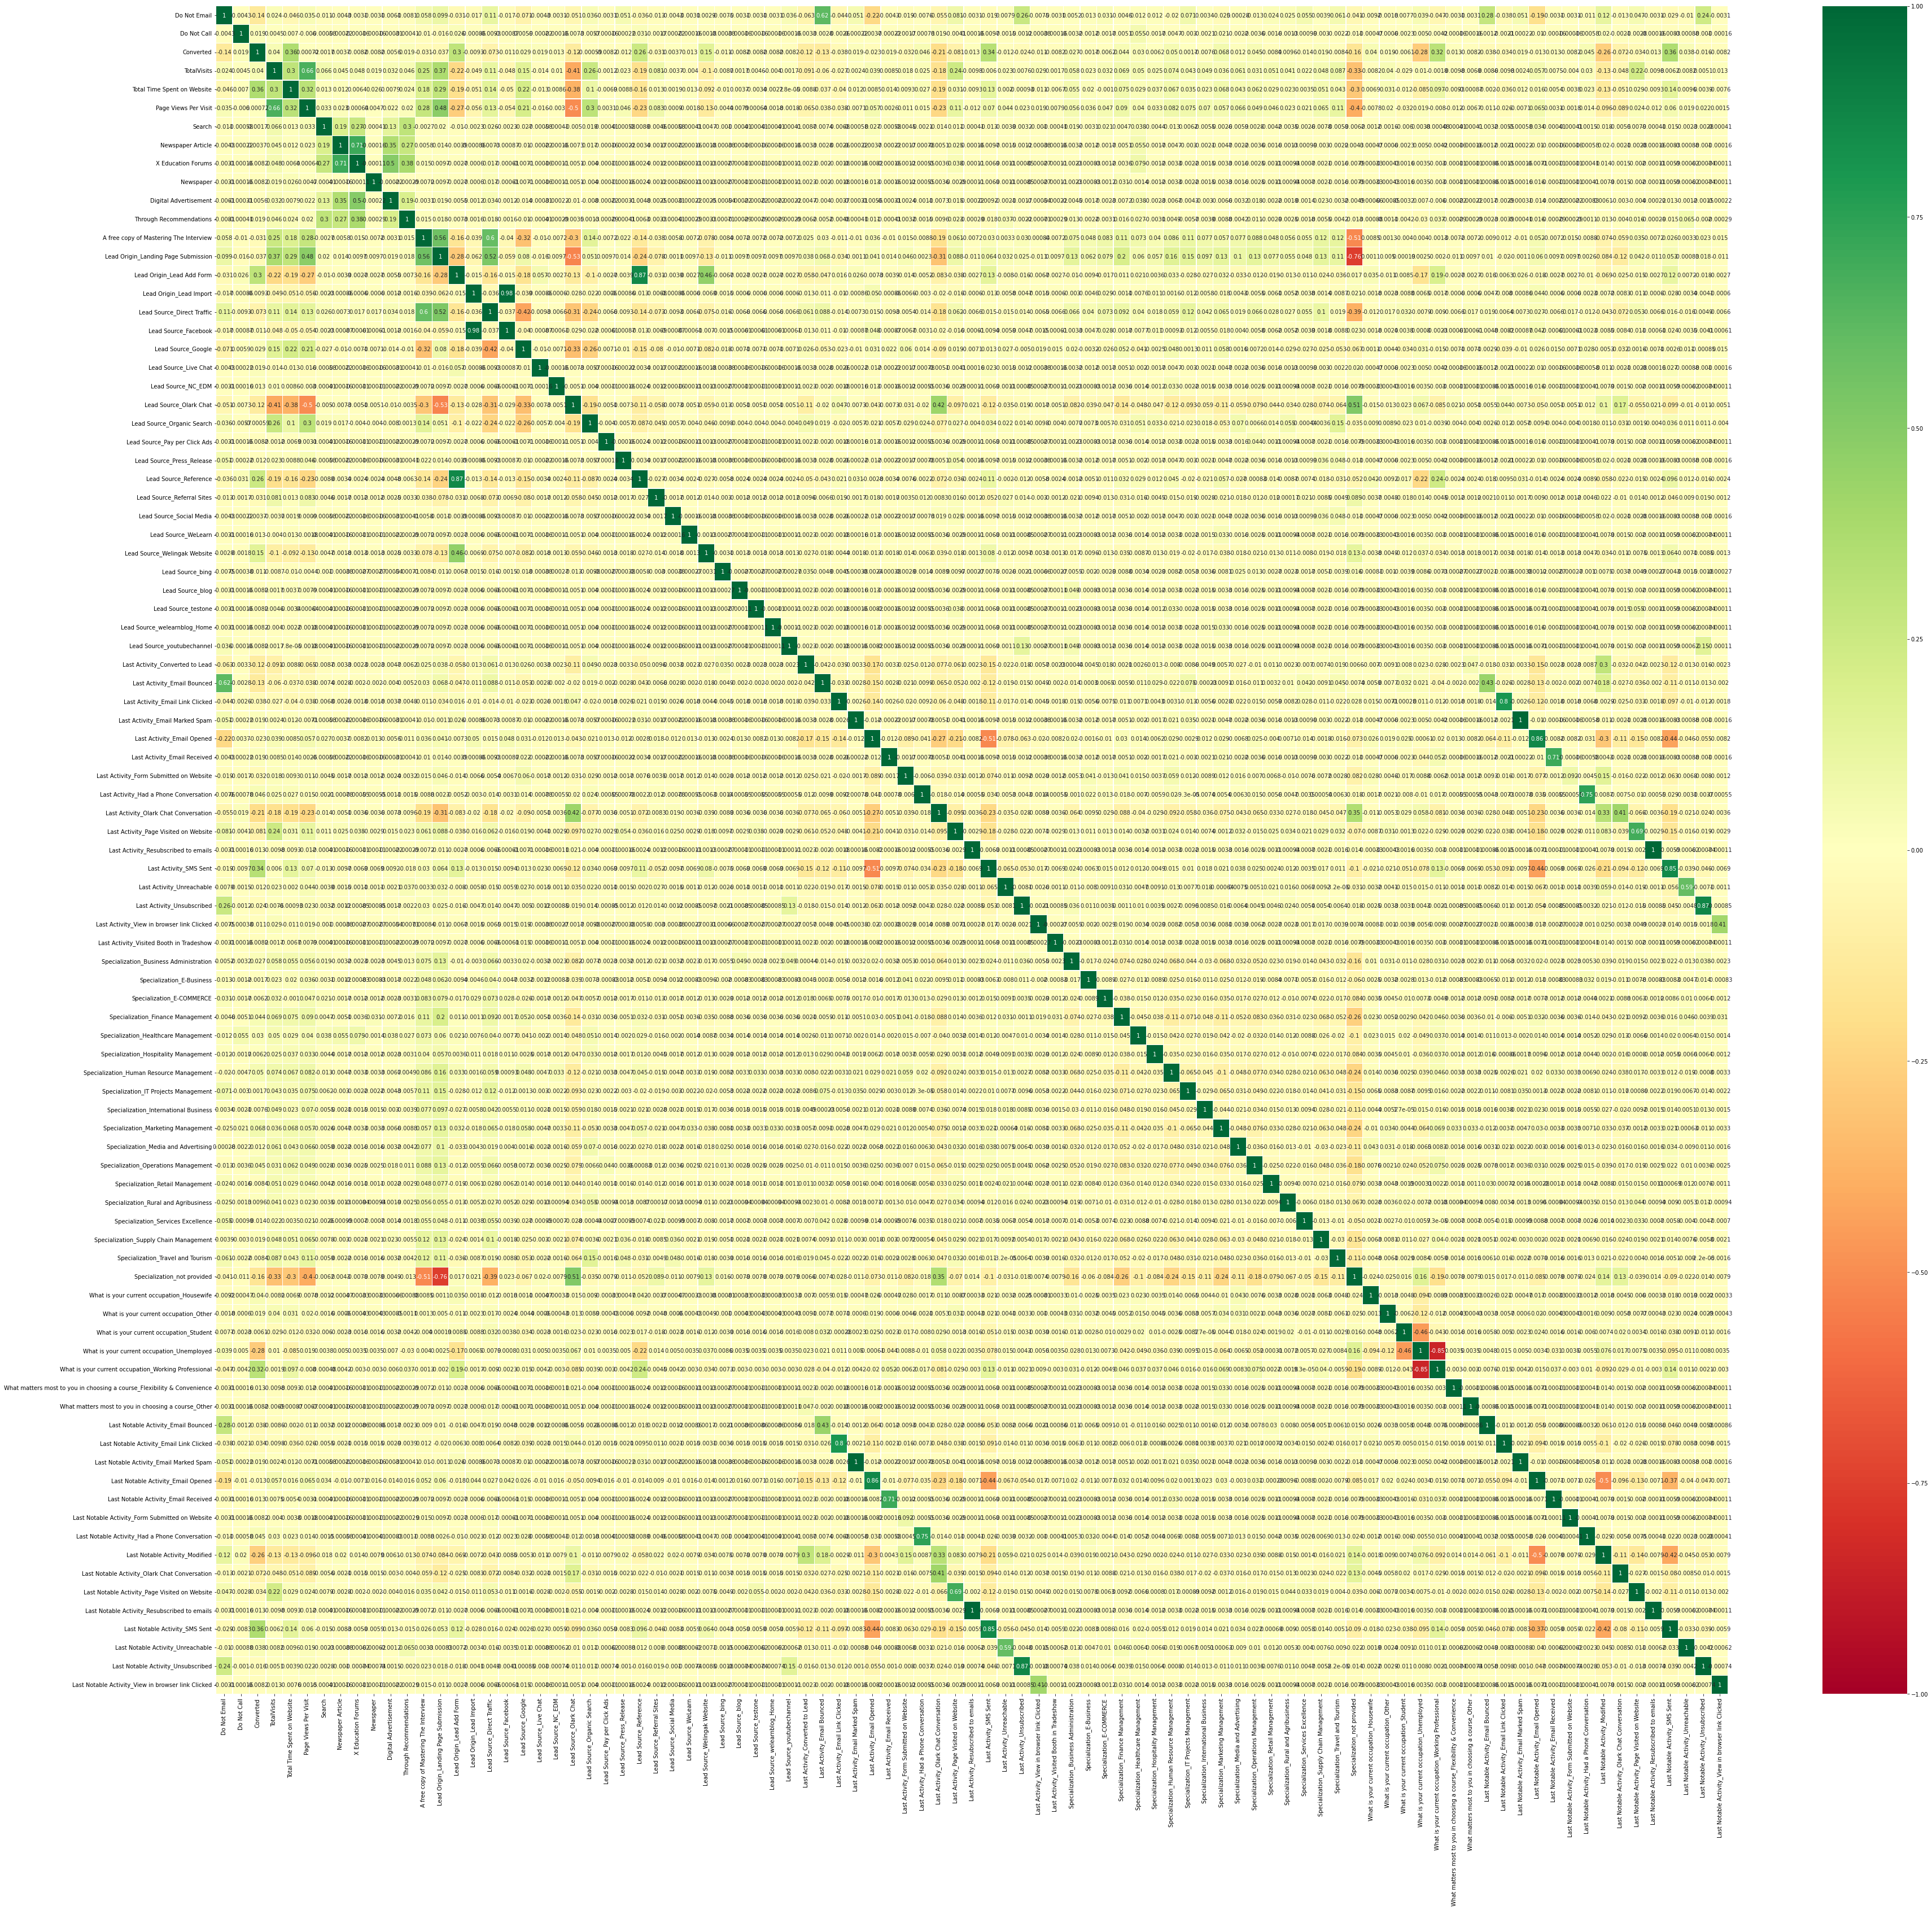

In [76]:
# correlation plot , since there are many variables to drop , dropping after RFE
plt.figure(figsize = (60,55))        # Size of the figure
sns.heatmap(df1.corr(),annot = True, cmap='RdYlGn', linewidths= .3, vmin= -1, vmax= 1)
plt.show()

Majority of the number of variables which have higher correlation values. Hence,  we are dropping the variables after RFE selection.

We observe two clusters of higher corrected variables in the graph. 

The variables are positively as well as negatively correlated

### Model Building


In [77]:
import statsmodels.api as sm

In [78]:
# Logistic regression model
logm_init = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm_init.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6349
Model:                            GLM   Df Residuals:                     6264
Model Family:                Binomial   Df Model:                           84
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2535.0
Date:                Tue, 24 Jan 2023   Deviance:                       5069.9
Time:                        10:22:21   Pearson chi2:                 6.39e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      27.1370   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Do Not Email                                                               -1.4293      0.224     -6.371      0.000      -1.869      -0.990
Do Not Call                                                                23.6423   8.73e+04      0.000      1.000   -1.71e+05    1.71e+05
TotalVisits                                                                 0.1897      0.047      4.048      0.000       0.098       0.282
Total Time Spent on Website                                                 1.0867      0.041     26.323      0.000       1.006       1.168
Page Views Per Visit                                                       -0.1962      0.054     -3.603      0.000      -0.303      -0.089
Search                                                                     -0.8341      1.149     -0.726      0.468      -3.087       1.418
Newspaper Article                                                          26.6672   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
X Education Forums                                                        -49.1066   2.33e+05     -0.000      1.000   -4.57e+05    4.57e+05
Newspaper                                                                 -26.1631   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Digital Advertisement                                                     -23.8007   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Through Recommendations                                                    23.1599   5.46e+04      0.000      1.000   -1.07e+05    1.07e+05
A free copy of Mastering The Interview                                     -0.0964      0.110     -0.875      0.382      -0.313       0.120
Lead Origin_Landing Page Submission                                        -0.9963      0.139     -7.160      0.000      -1.269      -0.724
Lead Origin_Lead Add Form                                                  -0.5409      1.461     -0.370      0.711      -3.404       2.322
Lead Origin_Lead Import                                                    -0.6454      0.998     -0.646      0.518      -2.602       1.311
Lead Source_Direct Traffic                                                 -2.3058      1.950     -1.183      0.237      -6.127       1.516
Lead Source_Facebook                                                       -0.6454      0.998     -0.646      0.518      -2.602       1.311
Lead Source_Google                                                         -2.0825      1.948     -1.069      0.285      -5.900       1.735
Lea

#### Feature selection using RFE

In [79]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [80]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [81]:
rfe.support_

array([ True, False, False,  True, False, False, False, False, False,
       False, False, False,  True,  True, False,  True, False,  True,
       False, False, False,  True, False, False, False,  True, False,
       False,  True, False, False, False, False, False,  True,  True,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
        True, False, False,  True, False, False, False, False, False,
        True, False, False, False, False,  True,  True, False, False])

In [82]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 18),
 ('TotalVisits', False, 43),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 42),
 ('Search', False, 19),
 ('Newspaper Article', False, 15),
 ('X Education Forums', False, 41),
 ('Newspaper', False, 6),
 ('Digital Advertisement', False, 16),
 ('Through Recommendations', False, 21),
 ('A free copy of Mastering The Interview', False, 60),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 33),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 48),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 35),
 ('Lead Source_NC_EDM', False, 27),
 ('Lead Source_Olark Chat', False, 22),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 45),
 ('Lead Source_Press_Release', False, 70),
 ('Lead Source_Reference', False, 10),
 ('Lead Source_Referral Sites', True, 1),
 

In [83]:
col = X_train.columns[rfe.support_]

In [84]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Olark Chat', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Las

In [85]:
X_train_sm = sm.add_constant(X_train[col])
logm0 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm0.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6349
Model:                            GLM   Df Residuals:                     6328
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2597.0
Date:                Tue, 24 Jan 2023   Deviance:                       5193.9
Time:                        10:22:31   Pearson chi2:                 6.51e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.7533      0.134      5.611      0.000       0.490       1.016
Do Not Email                                            -1.2631      0.199     -6.351      0.000      -1.653      -0.873
Total Time Spent on Website                              1.0873      0.040     26.890      0.000       1.008       1.167
Lead Origin_Landing Page Submission                     -1.0180      0.133     -7.675      0.000      -1.278      -0.758
Lead Origin_Lead Add Form                                2.1580      0.231      9.339      0.000       1.705       2.611
Lead Source_Direct Traffic                              -1.2380      0.148     -8.356      0.000      -1.528      -0.948
Lead Source_Google                                      -1.0136      0.126     -8.034      0.000      -1.261      -0.766
Lead Source_Organic Search                              -1.2143      0.148     -8.181      0.000      -1.505      -0.923
Lead Source_Referral Sites                              -1.4088      0.348     -4.051      0.000      -2.090      -0.727
Lead Source_Welingak Website                             2.4885      0.758      3.283      0.001       1.003       3.974
Last Activity_Converted to Lead                         -1.1325      0.213     -5.326      0.000      -1.549      -0.716
Last Activity_Email Bounced                             -1.7301      0.635     -2.723      0.006      -2.975      -0.485
Last Activity_Had a Phone Conversation                   1.0069      0.860      1.171      0.242      -0.679       2.692
Last Activity_Olark Chat Conversation                   -1.5383      0.171     -9.011      0.000      -1.873      -1.204
Specialization_not provided                             -1.1433      0.123     -9.276      0.000      -1.385      -0.902
What is your current occupation_Housewife               22.9262   1.43e+04      0.002      0.999    -2.8e+04     2.8e+04
What is your current occupation_Working Professional     2.7137      0.197     13.790      0.000       2.328       3.099
Last Notable Activity_Email Bounced                      2.3070      0.787      2.931      0.003       0.764       3.850
Last Notable Activity_Had a Phone Conversation           1.9275      1.416      1.361      0.173      -0.848       4.703
Last Notable Activity_SMS Sent                           1.5900      0.081     19.550      0.000       1.431       1.749
Last Notable Activity_Unreachable                        1.4734      0.495      2.977      0.003       0.503       2.443
========================================================================================================================
"""

In [86]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                                               const  15.84
3                 Lead Origin_Landing Page Submission   3.70
5                          Lead Source_Direct Traffic   3.65
14                        Specialization_not provided   2.95
6                                  Lead Source_Google   2.89
12             Last Activity_Had a Phone Conversation   2.26
18     Last Notable Activity_Had a Phone Conversation   2.26
7                          Lead Source_Organic Search   1.99
11                        Last Activity_Email Bounced   1.89
4                           Lead Origin_Lead Add Form   1.88
1                                        Do Not Email   1.65
2                         Total Time Spent on Website   1.33
9                        Lead Source_Welingak Website   1.32
13              Last Activity_Olark Chat Conversation   1.29
17                Last Notable Activity_Email Bounced   1.24
16  What is your current occupation_Working Profes...   1.15
19                     Last Notable Activity_SMS Sent   1.13
8                          Lead Source_Referral Sites   1.09
10                    Last Activity_Converted to Lead   1.06
15          What is your current occupation_Housewife   1.01
20                  Last Notable Activity_Unreachable   1.01

In [87]:
X_train_rfe = X_train[col]

In [88]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [89]:
X_train_new = X_train_rfe.drop(["What is your current occupation_Housewife"], axis = 1)

In [90]:
X_train_logm = sm.add_constant(X_train_new)

In [91]:
logm1 = sm.GLM(y_train,X_train_logm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6349
Model:                            GLM   Df Residuals:                     6329
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2602.6
Date:                Tue, 24 Jan 2023   Deviance:                       5205.3
Time:                        10:22:31   Pearson chi2:                 6.52e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.7587      0.134      5.656      0.000       0.496       1.022
Do Not Email                                            -1.2667      0.199     -6.370      0.000      -1.656      -0.877
Total Time Spent on Website                              1.0866      0.040     26.904      0.000       1.007       1.166
Lead Origin_Landing Page Submission                     -1.0153      0.132     -7.665      0.000      -1.275      -0.756
Lead Origin_Lead Add Form                                2.1721      0.231      9.411      0.000       1.720       2.624
Lead Source_Direct Traffic                              -1.2399      0.148     -8.375      0.000      -1.530      -0.950
Lead Source_Google                                      -1.0135      0.126     -8.035      0.000      -1.261      -0.766
Lead Source_Organic Search                              -1.2059      0.148     -8.137      0.000      -1.496      -0.915
Lead Source_Referral Sites                              -1.4091      0.348     -4.053      0.000      -2.090      -0.728
Lead Source_Welingak Website                             2.4753      0.758      3.266      0.001       0.990       3.961
Last Activity_Converted to Lead                         -1.1378      0.213     -5.352      0.000      -1.554      -0.721
Last Activity_Email Bounced                             -1.7329      0.635     -2.728      0.006      -2.978      -0.488
Last Activity_Had a Phone Conversation                   0.9982      0.860      1.161      0.246      -0.687       2.683
Last Activity_Olark Chat Conversation                   -1.5408      0.171     -9.026      0.000      -1.875      -1.206
Specialization_not provided                             -1.1483      0.123     -9.325      0.000      -1.390      -0.907
What is your current occupation_Working Professional     2.7080      0.197     13.761      0.000       2.322       3.094
Last Notable Activity_Email Bounced                      2.3084      0.787      2.933      0.003       0.766       3.851
Last Notable Activity_Had a Phone Conversation           1.9290      1.416      1.362      0.173      -0.846       4.704
Last Notable Activity_SMS Sent                           1.5837      0.081     19.487      0.000       1.424       1.743
Last Notable Activity_Unreachable                        1.4658      0.495      2.962      0.003       0.496       2.436
========================================================================================================================
"""

In [92]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                                               const  15.83
3                 Lead Origin_Landing Page Submission   3.70
5                          Lead Source_Direct Traffic   3.65
14                        Specialization_not provided   2.95
6                                  Lead Source_Google   2.89
12             Last Activity_Had a Phone Conversation   2.26
17     Last Notable Activity_Had a Phone Conversation   2.26
7                          Lead Source_Organic Search   1.99
11                        Last Activity_Email Bounced   1.89
4                           Lead Origin_Lead Add Form   1.87
1                                        Do Not Email   1.65
2                         Total Time Spent on Website   1.33
9                        Lead Source_Welingak Website   1.32
13              Last Activity_Olark Chat Conversation   1.29
16                Last Notable Activity_Email Bounced   1.24
15  What is your current occupation_Working Profes...   1.15
18                     Last Notable Activity_SMS Sent   1.13
8                          Lead Source_Referral Sites   1.09
10                    Last Activity_Converted to Lead   1.06
19                  Last Notable Activity_Unreachable   1.01

In [93]:
X_train_new = X_train_new.drop(["Last Activity_Had a Phone Conversation"], axis = 1)
X_train_logm = sm.add_constant(X_train_new)
logm2 = sm.GLM(y_train,X_train_logm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6349
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2603.3
Date:                Tue, 24 Jan 2023   Deviance:                       5206.6
Time:                        10:22:32   Pearson chi2:                 6.52e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.7581      0.134      5.652      0.000       0.495       1.021
Do Not Email                                            -1.2656      0.199     -6.363      0.000      -1.655      -0.876
Total Time Spent on Website                              1.0868      0.040     26.914      0.000       1.008       1.166
Lead Origin_Landing Page Submission                     -1.0147      0.132     -7.661      0.000      -1.274      -0.755
Lead Origin_Lead Add Form                                2.1724      0.231      9.414      0.000       1.720       2.625
Lead Source_Direct Traffic                              -1.2381      0.148     -8.365      0.000      -1.528      -0.948
Lead Source_Google                                      -1.0129      0.126     -8.032      0.000      -1.260      -0.766
Lead Source_Organic Search                              -1.1982      0.148     -8.095      0.000      -1.488      -0.908
Lead Source_Referral Sites                              -1.3867      0.345     -4.025      0.000      -2.062      -0.711
Lead Source_Welingak Website                             2.4744      0.758      3.264      0.001       0.989       3.960
Last Activity_Converted to Lead                         -1.1412      0.213     -5.369      0.000      -1.558      -0.725
Last Activity_Email Bounced                             -1.7371      0.635     -2.735      0.006      -2.982      -0.492
Last Activity_Olark Chat Conversation                   -1.5428      0.171     -9.038      0.000      -1.877      -1.208
Specialization_not provided                             -1.1463      0.123     -9.311      0.000      -1.388      -0.905
What is your current occupation_Working Professional     2.7095      0.197     13.774      0.000       2.324       3.095
Last Notable Activity_Email Bounced                      2.3095      0.787      2.934      0.003       0.767       3.852
Last Notable Activity_Had a Phone Conversation           2.9265      1.126      2.600      0.009       0.720       5.133
Last Notable Activity_SMS Sent                           1.5810      0.081     19.464      0.000       1.422       1.740
Last Notable Activity_Unreachable                        1.4619      0.495      2.954      0.003       0.492       2.432
========================================================================================================================
"""

In [94]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                                               const  15.83
3                 Lead Origin_Landing Page Submission   3.69
5                          Lead Source_Direct Traffic   3.65
13                        Specialization_not provided   2.95
6                                  Lead Source_Google   2.89
7                          Lead Source_Organic Search   1.99
11                        Last Activity_Email Bounced   1.89
4                           Lead Origin_Lead Add Form   1.87
1                                        Do Not Email   1.65
2                         Total Time Spent on Website   1.33
9                        Lead Source_Welingak Website   1.32
12              Last Activity_Olark Chat Conversation   1.29
15                Last Notable Activity_Email Bounced   1.24
14  What is your current occupation_Working Profes...   1.15
17                     Last Notable Activity_SMS Sent   1.13
8                          Lead Source_Referral Sites   1.08
10                    Last Activity_Converted to Lead   1.06
18                  Last Notable Activity_Unreachable   1.01
16     Last Notable Activity_Had a Phone Conversation   1.00

In [95]:
# check the parameters obtained
res.params

const                                                   0.758138
Do Not Email                                           -1.265637
Total Time Spent on Website                             1.086752
Lead Origin_Landing Page Submission                    -1.014704
Lead Origin_Lead Add Form                               2.172364
Lead Source_Direct Traffic                             -1.238092
Lead Source_Google                                     -1.012917
Lead Source_Organic Search                             -1.198169
Lead Source_Referral Sites                             -1.386726
Lead Source_Welingak Website                            2.474431
Last Activity_Converted to Lead                        -1.141219
Last Activity_Email Bounced                            -1.737149
Last Activity_Olark Chat Conversation                  -1.542773
Specialization_not provided                            -1.146291
What is your current occupation_Working Professional    2.709538
Last Notable Activity_Ema

In [96]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_new).values.reshape(-1)
y_train_pred[:10]

array([0.11468651, 0.0526122 , 0.66958895, 0.78838469, 0.851225  ,
       0.99809468, 0.71086184, 0.6301175 , 0.58439525, 0.03188519])

In [97]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_probability':y_train_pred})
y_train_pred_final['lead ID'] = y_train.index
y_train_pred_final.head()

Converted  Converted_probability  lead ID
0          0               0.114687     7114
1          0               0.052612     4749
2          1               0.669589     7987
3          1               0.788385     1281
4          1               0.851225     7347

In [98]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_probability.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Converted  Converted_probability  lead ID  predicted
0          0               0.114687     7114          0
1          0               0.052612     4749          0
2          1               0.669589     7987          1
3          1               0.788385     1281          1
4          1               0.851225     7347          1

In [99]:
y_train_pred_final['Lead Score'] = round((y_train_pred_final.Converted_probability*100))
y_train_pred_final['Lead Score']

0       11.0
1        5.0
2       67.0
3       79.0
4       85.0
        ... 
6344    25.0
6345    92.0
6346    30.0
6347    56.0
6348    13.0
Name: Lead Score, Length: 6349, dtype: float64

In [100]:
y_train_pred_final['Visitor_type'] = y_train_pred_final['Lead Score'].apply(lambda x: 'Hot Lead' if x > 50 else 'Normal Visitor')
y_train_pred_final.head()

Converted  Converted_probability  lead ID  predicted  Lead Score  \
0          0               0.114687     7114          0        11.0   
1          0               0.052612     4749          0         5.0   
2          1               0.669589     7987          1        67.0   
3          1               0.788385     1281          1        79.0   
4          1               0.851225     7347          1        85.0   

     Visitor_type  
0  Normal Visitor  
1  Normal Visitor  
2        Hot Lead  
3        Hot Lead  
4        Hot Lead

In [101]:
from sklearn import metrics

In [102]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3470  457]
 [ 713 1709]]


In [103]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8157190108678533


#### other metrics : specificity, sensitivity, recall, roc

In [104]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [105]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7056151940545005

In [106]:
# Let us calculate specificity
TN / float(TN+FP)

0.8836261777438248

In [107]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.1163738222561752


In [108]:
# positive predictive value 
print (TP / float(TP+FP))

0.7890120036934442


In [109]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8295481711690175


#### ROC curve

In [110]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [111]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_probability, drop_intermediate = False )

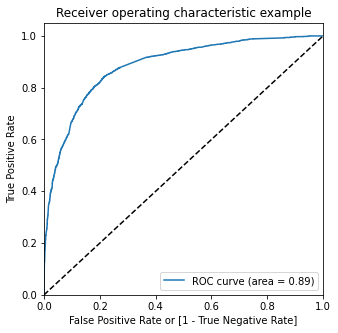

In [112]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_probability)

#### finding optimal cutoff- point

In [113]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_probability.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_probability  lead ID  predicted  Lead Score  \
0          0               0.114687     7114          0        11.0   
1          0               0.052612     4749          0         5.0   
2          1               0.669589     7987          1        67.0   
3          1               0.788385     1281          1        79.0   
4          1               0.851225     7347          1        85.0   

     Visitor_type  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  
0  Normal Visitor    1    1    0    0    0    0    0    0    0    0  
1  Normal Visitor    1    0    0    0    0    0    0    0    0    0  
2        Hot Lead    1    1    1    1    1    1    1    0    0    0  
3        Hot Lead    1    1    1    1    1    1    1    1    0    0  
4        Hot Lead    1    1    1    1    1    1    1    1    1    0

In [114]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381477  1.000000  0.000000
0.1   0.1  0.591117  0.970685  0.357016
0.2   0.2  0.739644  0.917424  0.629997
0.3   0.3  0.803749  0.849711  0.775401
0.4   0.4  0.816822  0.783650  0.837280
0.5   0.5  0.815719  0.705615  0.883626
0.6   0.6  0.798708  0.592073  0.926152
0.7   0.7  0.782958  0.511974  0.950089
0.8   0.8  0.760750  0.420314  0.970716
0.9   0.9  0.716806  0.276218  0.988541


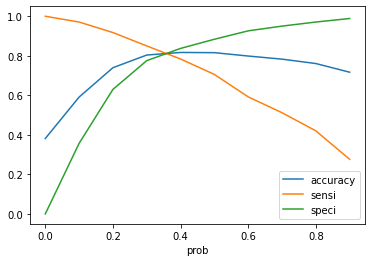

In [115]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [116]:
# from the above 0.45 would be optimal cutoff point
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_probability.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

Converted  Converted_probability  lead ID  predicted  Lead Score  \
0          0               0.114687     7114          0        11.0   
1          0               0.052612     4749          0         5.0   
2          1               0.669589     7987          1        67.0   
3          1               0.788385     1281          1        79.0   
4          1               0.851225     7347          1        85.0   

     Visitor_type  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  \
0  Normal Visitor    1    1    0    0    0    0    0    0    0    0   
1  Normal Visitor    1    0    0    0    0    0    0    0    0    0   
2        Hot Lead    1    1    1    1    1    1    1    0    0    0   
3        Hot Lead    1    1    1    1    1    1    1    1    0    0   
4        Hot Lead    1    1    1    1    1    1    1    1    1    0   

   final_predicted  
0                0  
1                0  
2                1  
3                1  
4                1

In [117]:
y_train_pred_final['Lead Score'] = round((y_train_pred_final.Converted_probability*100))
y_train_pred_final['Lead Score']

0       11.0
1        5.0
2       67.0
3       79.0
4       85.0
        ... 
6344    25.0
6345    92.0
6346    30.0
6347    56.0
6348    13.0
Name: Lead Score, Length: 6349, dtype: float64

In [118]:
y_train_pred_final['Visitor_type'] = y_train_pred_final['Lead Score'].apply(lambda x: 'Hot Lead' if x > 50 else 'Normal Visitor')
y_train_pred_final.head()

Converted  Converted_probability  lead ID  predicted  Lead Score  \
0          0               0.114687     7114          0        11.0   
1          0               0.052612     4749          0         5.0   
2          1               0.669589     7987          1        67.0   
3          1               0.788385     1281          1        79.0   
4          1               0.851225     7347          1        85.0   

     Visitor_type  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  \
0  Normal Visitor    1    1    0    0    0    0    0    0    0    0   
1  Normal Visitor    1    0    0    0    0    0    0    0    0    0   
2        Hot Lead    1    1    1    1    1    1    1    0    0    0   
3        Hot Lead    1    1    1    1    1    1    1    1    0    0   
4        Hot Lead    1    1    1    1    1    1    1    1    1    0   

   final_predicted  
0                0  
1                0  
2                1  
3                1  
4                1

In [119]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8094188061111987

In [120]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3158,  769],
       [ 441, 1981]])

In [121]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [122]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8179190751445087

In [123]:
# Let us calculate specificity
TN / float(TN+FP)

0.8041762159409218

In [124]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.1958237840590782


In [125]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7203636363636363


In [126]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8774659627674354


#### precision & Recall

In [127]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3470,  457],
       [ 713, 1709]])

In [128]:
# precison
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7890120036934442

In [129]:
# recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7056151940545005

In [130]:
from sklearn.metrics import precision_score, recall_score

print("precision_score:",precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted))
print("Recall score: ",recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

precision_score: 0.7890120036934442
Recall score:  0.7056151940545005


#### precision and recall trade off

In [131]:
from sklearn.metrics import precision_recall_curve

In [132]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       1
 3       1
 4       1
        ..
 6344    0
 6345    1
 6346    0
 6347    1
 6348    0
 Name: Converted, Length: 6349, dtype: int64, 0       0
 1       0
 2       1
 3       1
 4       1
        ..
 6344    0
 6345    1
 6346    0
 6347    1
 6348    0
 Name: predicted, Length: 6349, dtype: int64)

In [133]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_probability)

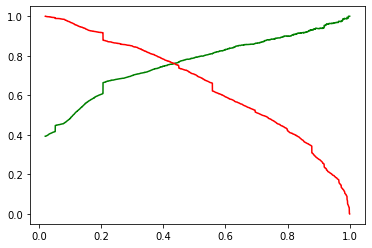

In [134]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")

plt.show()

#### making prediction on the test set

In [135]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]= scaler.transform(X_test[	['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])


In [136]:
col = col.drop(['What is your current occupation_Housewife','Last Activity_Had a Phone Conversation'], 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Specialization_not provided',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [137]:
X_test = X_test[col]
X_test.head()

Do Not Email  Total Time Spent on Website  \
4703             0                    -0.723467   
5544             0                     1.762713   
5520             0                    -0.773044   
1342             0                    -0.806095   
4101             1                    -0.530669   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
4703                                    1                          0   
5544                                    1                          0   
5520                                    1                          0   
1342                                    1                          0   
4101                                    1                          0   

      Lead Source_Direct Traffic  Lead Source_Google  \
4703                           0                   1   
5544                           1                   0   
5520                           1                   0   
1342                           1                   0   
4101                           1                   0   

      Lead Source_Organic Search  Lead Source_Referral Sites  \
4703                           0                           0   
5544                           0                           0   
5520                           0                           0   
1342                           0                           0   
4101                           0                           0   

      Lead Source_Welingak Website  Last Activity_Converted to Lead  \
4703                             0                                0   
5544                             0                                0   
5520                             0                                0   
1342                             0                                1   
4101                             0                                0   

      Last Activity_Email Bounced  Last Activity_Olark Chat Conversation  \
4703                            0                                      0   
5544                            0                                      0   
5520                            0                                      0   
1342                            0                                      0   
4101                            1                                      0   

      Specialization_not provided  \
4703                            0   
5544                            0   
5520                            0   
1342                            0   
4101                            1   

      What is your current occupation_Working Professional  \
4703                                                  0      
5544                                                  0      
5520                                                  0      
1342                                                  0      
4101                                                  0      

      Last Notable Activity_Email Bounced  \
4703                                    0   
5544                                    0   
5520                                    0   
1342                                    0   
4101                                    0   

      Last Notable Activity_Had a Phone Conversation  \
4703                                               0   
5544                                               0   
5520                                               0   
1342                                               0   
4101                                               0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  
4703                               1                                  0  
5544                               0                                  0  
5520                               0                                  0  
1342                               0                                  0  
4101                               0                                  0

In [138]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.shape

(2722, 19)

In [139]:
# making predictions on test ste
y_test_pred= res.predict(X_test_sm)

In [140]:
y_test_pred[:10]

4703    0.383500
5544    0.603716
5520    0.088284
1342    0.028975
4101    0.001984
569     0.136321
7012    0.373350
3433    0.052612
8801    0.929868
2429    0.054434
dtype: float64

In [141]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

0
4703  0.383500
5544  0.603716
5520  0.088284
1342  0.028975
4101  0.001984

In [142]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [143]:
# Putting Lead ID to index
y_test_df['Lead ID'] = y_test_df.index

In [144]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [145]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [146]:
y_pred_final.head()

Converted  Lead ID         0
0          1     4703  0.383500
1          0     5544  0.603716
2          0     5520  0.088284
3          1     1342  0.028975
4          0     4101  0.001984

In [147]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_probability'})

In [148]:
# Rearranging the columns
y_pred_final = y_pred_final[['Lead ID','Converted','Converted_probability']]
y_pred_final.head()

Lead ID  Converted  Converted_probability
0     4703          1               0.383500
1     5544          0               0.603716
2     5520          0               0.088284
3     1342          1               0.028975
4     4101          0               0.001984

In [149]:
y_pred_final['final_predicted'] = y_pred_final['Converted_probability'].map(lambda x: 1 if x > 0.35 else 0)

In [150]:
y_pred_final['Lead Score'] = round((y_pred_final.Converted_probability*100))
y_pred_final['Lead Score']

0        38.0
1        60.0
2         9.0
3         3.0
4         0.0
        ...  
2717     34.0
2718     99.0
2719     18.0
2720    100.0
2721     23.0
Name: Lead Score, Length: 2722, dtype: float64

In [151]:
y_pred_final['Visitor_type'] = y_pred_final['Lead Score'].apply(lambda x: 'Hot Lead' if x > 50 else 'Normal Visitor')
y_pred_final.head()

Lead ID  Converted  Converted_probability  final_predicted  Lead Score  \
0     4703          1               0.383500                1        38.0   
1     5544          0               0.603716                1        60.0   
2     5520          0               0.088284                0         9.0   
3     1342          1               0.028975                0         3.0   
4     4101          0               0.001984                0         0.0   

     Visitor_type  
0  Normal Visitor  
1        Hot Lead  
2  Normal Visitor  
3  Normal Visitor  
4  Normal Visitor

In [152]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8071271124173401

In [153]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1373,  337],
       [ 188,  824]])

In [154]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [155]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8142292490118577

In [156]:
# Let us calculate specificity
TN / float(TN+FP)

0.8029239766081872

--------------------------------------------------------------------